# Learning a qaudratic with a simple neural net

Here we want to train a simple neural net to learn the function $f(x)=x^2$ and explore aspects of the landscape of the related loss function. The network we will train, depicted below, has a single input neuron, a single hidden layer with two neurons and a single output neuron. The network we will be training uses the sigmoid function as its activation function and so the output of the network will be a number in the interval $[0,1]$. For this reason, we will focus on learning the function $f(x)=x^2$ over the domain $[-1,1]$ so that the range of $f$ matches the range of out network.

<img src="Images/net_1_2_1.png" height="500" width="475">

We start by import the libraries we need and defining a python function for the function we want to learn. 

In [58]:
import numpy as np
import neural_network as nn
import matplotlib.pyplot as plt

# If we make changes to the neural_network module after importing it,
# we need to reload the module to get those changes. importing again may not work.
from importlib import reload
reload(nn)



def func(x):
    """The function x^2"""
    return x**2

### Generate training and test data
Here, we generate an array of random points uniformly distributed in the interval $[0,1]$ and then compute the value of $f(x)$ for each random point. This gives us a data set to train our network on. A second data set is generated, in the same way, to be used for testing how well the network generalises.

In [59]:
num_rand_points = 10000

random_xs = 2*np.random.rand(num_rand_points) - 1
target_ys = func(random_xs)
training_data = [ (x,y) for x,y in zip(random_xs,target_ys) ]

num_test_points = 1000

random_test_xs = 2*np.random.rand(num_test_points) - 1
target_test_ys = func(random_test_xs)

### Train the network with the data
Here we create the network described above and train it on the data we just generated. The network is trained for a number of epochs and the output of the network, as a function of $x$, is recorded after each epoch.

In [60]:
# Create neural network
net = nn.NeuralNetwork([1,2,1])

# Create domain x and specify number of epochs to train for
x = np.arange(-1,1,0.01); num = 100

# Allocate memory to store output of network after each epoch
y = np.zeros([num+1,len(x)])
y[0,:] = np.asarray( list(map(net.feed_forward, x)) ).reshape(len(x))

# begin training
print('Training network')
for i in range(1,num+1):
    
    net.stochastic_gradient_decent(training_data, 1, 50, 1.0)
    
    # record the output of the network as a function of x
    y[i,:] = np.asarray( list(map(net.feed_forward, x)) ).reshape(len(x))
    
print('Finished training')

# Save the trained weights and biases
weights = net.weights
biases = net.biases

Training network
Finished training


### Animate the netowrks output as it learned
Here we display the output of the network, as a function $x$, and animate how the output evolved after each epoch.

In [61]:
%%capture
# The magic command capture will surpress any output produced in this cell. 
# The animation is produced in the next cell. This avoids drawing unwanted figures.
from matplotlib import animation
from IPython.display import HTML

# Set up figure
fig, ax = plt.subplots()
ax.set_xlim([-1,1])
ax.set_ylim([0,1])
ax.set_xlabel('x')
ax.set_ylabel('y')

# allocate memory for training data and network output respectively
dots, = ax.plot([],[],'o',markerSize=1)
line, = ax.plot([],[],lw=4, c='darkslategray')

def init():
    """This function plots the training data as a background for the animation"""
    dots.set_data(random_xs ,target_ys)
    return (dots,)

def animate(i):
    """This function is used to animate the networks output"""
    ax.set_title('Epoch {0}'.format(i))
    line.set_data(x, y[i,:])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func = init, frames=num+1, interval=30, blit=True)


In [62]:
# Display the animation in a javascript widget
HTML(anim.to_jshtml())

### Exploring the landscape of the loss function in the vicinity of trained weights and biases
Here we evaluate the change in loss due to a variation in one of the networks parameters. We number the parameters of the network 0 to 6. The weights connecting the first two layers are numbers 0 and 1 while the weights connecting the second and third layers are numbered 2 and 3. The biases of the hidden layers are numbered 4 and 5 while the bias for the output neuron is given the number 6. Given the trained weights and biases $\omega_i$, we vary a particular parameter by adding a constant $\delta \omega_i$ ranging from -10 to 10 while holding all other parameters fixed. The loss function is evaluated with each variation in the parameter and recorded in the array named ls. This is repeated for each parameter of the network.

In [63]:
from itertools import chain


def loss(net, xs, ys):
    """
    The loss function is the average squared Euclidean distance between the network 
    output and the target output of the test data
    """
    dists = [ (y - net.feed_forward(x))**2
              for x,y in zip(xs,ys) ]
    
    return sum(dists)/len(dists)

# Define the range by which each parameter will be varied
domega = np.arange(-10,10,0.1)

# Allocate memory to hold evaulations of the loss function
ls = np.zeros( [sum([w.size for w in chain(weights,biases)]) ,len(domega)])

# Loop through all the weights and biases of the network
k = 0
for param in chain(weights,biases):
    
    # Loop through the components/parameters of weigths and biases
    n,m = param.shape
    for i in range(n):
        for j in range(m):
            
            # Store the trained value of the parameter
            omega = param[i,j]

            # Calculate the loss after varying the parameter.
            for l, dw in enumerate(domega):
                param[i,j] = omega + dw
                ls[k,l] = loss(net, random_test_xs, target_test_ys)
            
            print('calculated loss while varying omega_{0}'
                  .format(k) )
            
            # Reset parameter back to trained value
            param[i,j] = omega
            k += 1

calculated loss while varying omega_0
calculated loss while varying omega_1
calculated loss while varying omega_2
calculated loss while varying omega_3
calculated loss while varying omega_4
calculated loss while varying omega_5
calculated loss while varying omega_6


### Plotting the loss function in the vicinity of the trained weights and biases
Here we plot the loss as a function of the variation $\delta \omega_i$ of each of the network parameters. If the network found a local minimum of the loss function while being trained we should see each curve having a local minimum at $\delta\omega_i = 0$.

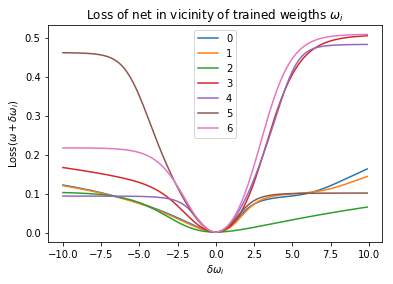

In [64]:
plt.figure(2)
for pic in range(ls.shape[0]):
    plt.plot(domega, ls[pic,:], label='{0}'.format(pic) )

plt.title(r'Loss of net in vicinity of trained weigths $\omega_i$')
plt.xlabel(r'$\delta \omega_i$')
plt.ylabel(r'Loss$(\omega +\delta \omega_i)$')
plt.legend()